In [1]:
import numpy as np
import matplotlib.pyplot as pp
from scipy.special import jv, jn_zeros
from IPython.display import HTML
from matplotlib import animation

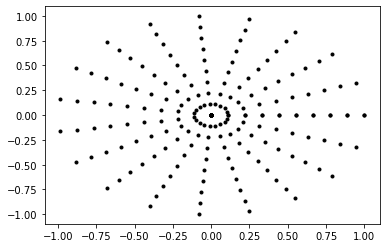

In [2]:
r,th = np.meshgrid(np.linspace(0,1,10), np.linspace(0,2*np.pi,20))

def pol2cart(r,th):
    return r*(np.cos(th), np.sin(th))

x,y = pol2cart(r,th)

pp.plot(x,y, 'k.')

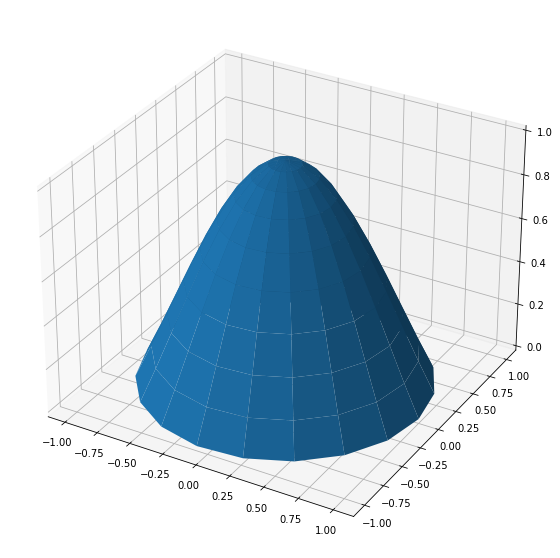

In [3]:
r0 = jn_zeros(0,2)[0]
z = jv(0,r*r0)
fig = pp.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x,y,z)

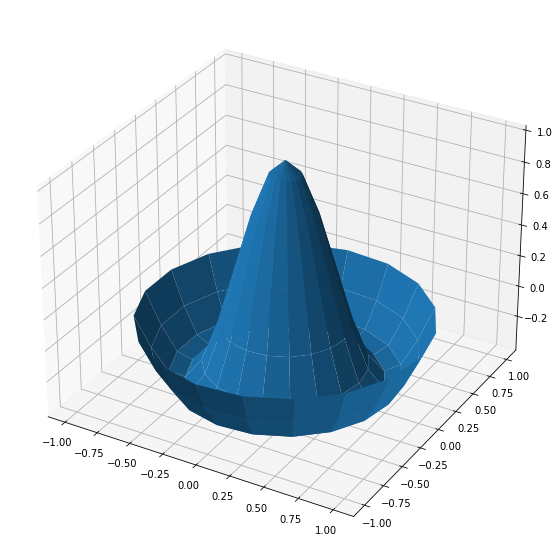

In [4]:
r1 = jn_zeros(0,2)[1]
z = jv(0,r*r1)
fig = pp.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x,y,z)

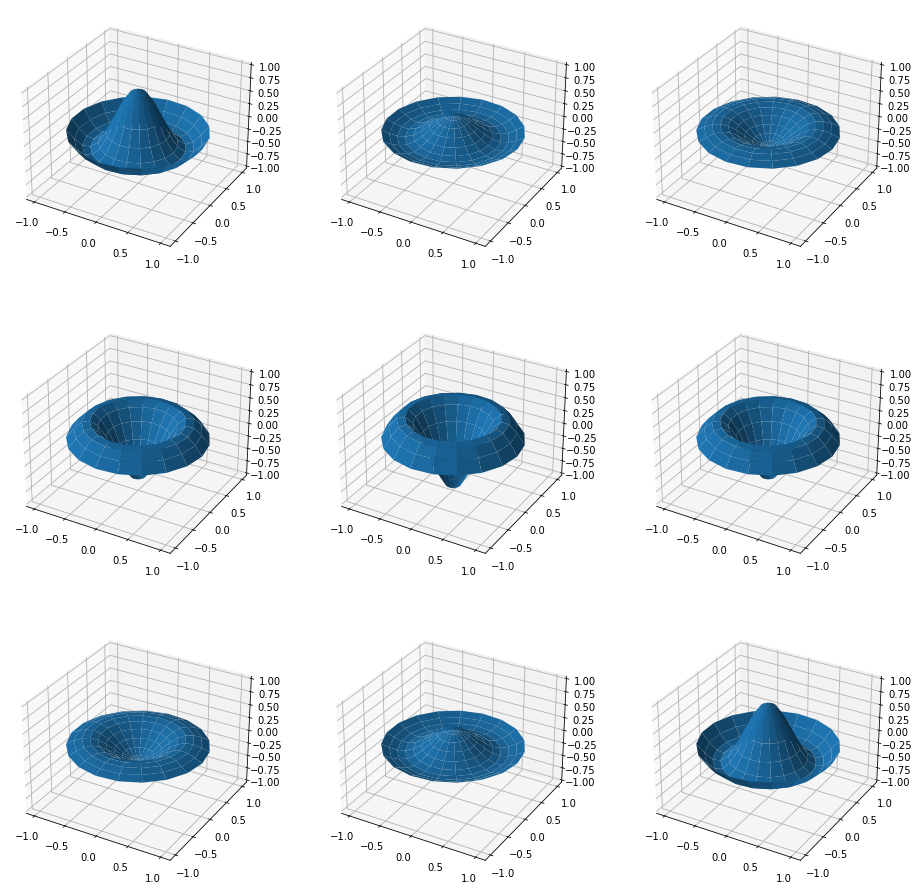

In [5]:
fig = pp.figure(figsize=(16,16))

for i in range(1,10):
    ax = fig.add_subplot(3,3,i, projection='3d')
    ax.set(zlim3d=(-1, 1))
    z = jv(0,r*r1) * np.cos(2*np.pi*i/10)
    ax.plot_surface(x,y,z)

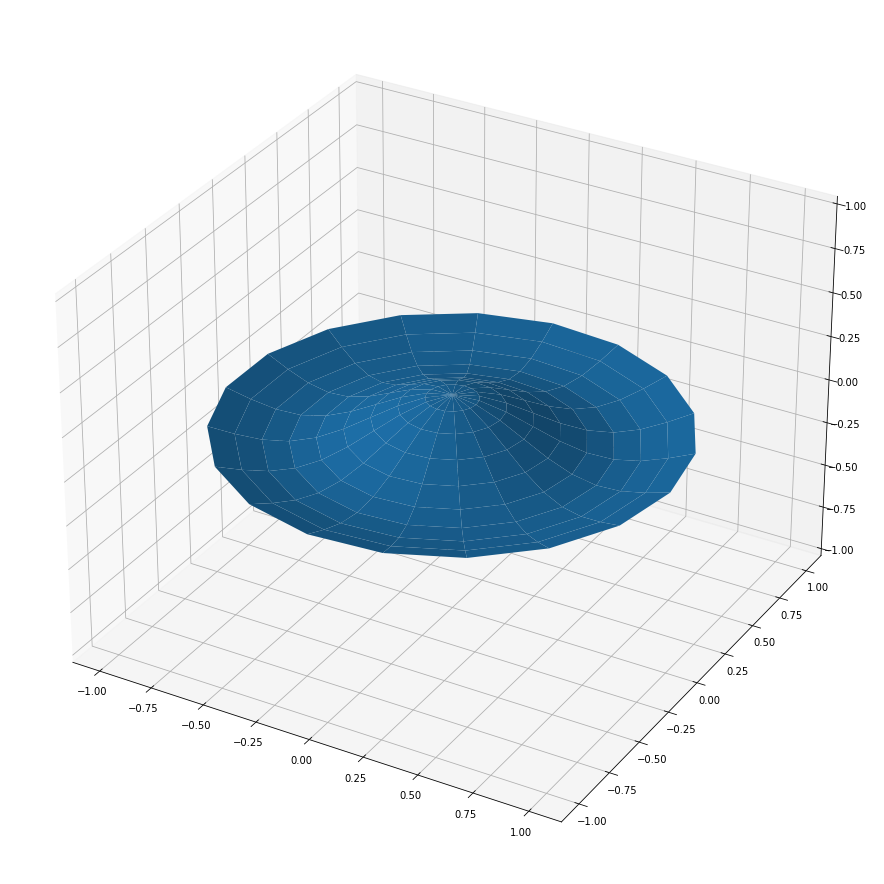

In [10]:
fig = pp.figure(figsize=(16,16))

def drawframe(t):
    ax = fig.add_subplot(projection='3d')
    ax.set(zlim3d=(-1, 1))
    z = jv(0,r*r1) * np.cos(t) * 0.2
    #return ax.plot_surface(x,y,z, cmap=pp.cm.turbo, vmin=-0.5, vmax=0.5)
    return ax.plot_surface(x,y,z)

a = animation.FuncAnimation(fig, drawframe, frames=np.linspace(0,2*np.pi,10), interval=100, cache_frame_data=False)
HTML(a.to_html5_video())

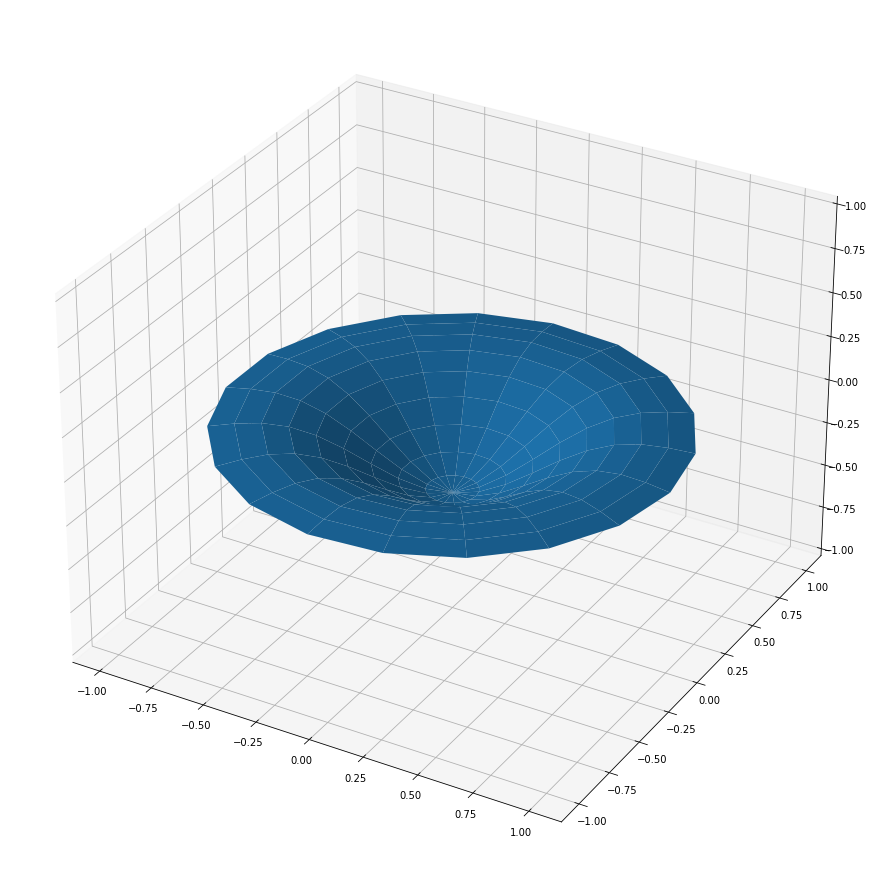

In [12]:
fig = pp.figure(figsize=(16,16))

def drawframe(t):
    ax = fig.add_subplot(projection='3d')
    ax.set(zlim3d=(-1, 1))
    z0 = jv(0,r*r0) * np.cos(t*r0) * 0.2
    z1 = jv(0,r*r1) * np.cos(t*r1) * 0.2
    #return ax.plot_surface(x,y,z0+z1, cmap=pp.cm.turbo, vmin=-0.5, vmax=0.5)
    return ax.plot_surface(x,y,z0+z1)

a = animation.FuncAnimation(fig, drawframe, frames=np.linspace(0,2*np.pi,60), interval=30, cache_frame_data=False)
HTML(a.to_html5_video())

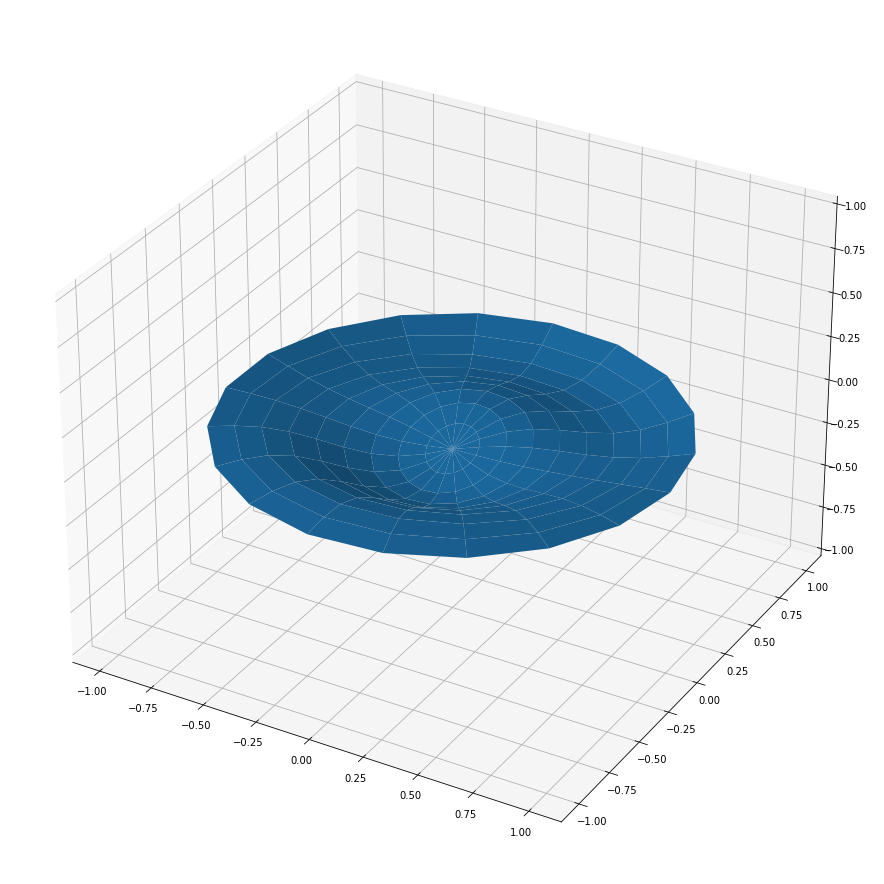

In [15]:
fig = pp.figure(figsize=(16,16))
r0 = jn_zeros(0,2)[0]
r1 = jn_zeros(1,2)[1]

def drawframe(t):
    ax = fig.add_subplot(projection='3d')
    ax.set(zlim3d=(-1, 1))
    z0 = jv(0,r*r0) * np.cos(t*r0) * 0.2
    z1 = jv(1,r*r1) * np.cos(t*r1) * np.sin(th) * 0.2
    #return ax.plot_surface(x,y,z0+z1, cmap=pp.cm.turbo, vmin=-0.5, vmax=0.5)
    ax.plot_surface(x,y,z0+z1)
    return None

a = animation.FuncAnimation(fig, drawframe, frames=np.linspace(0,2*np.pi/r1,60), interval=30, cache_frame_data=False)
HTML(a.to_html5_video())